In [2]:
# 🌍 Project: COVID-19 Global Data Tracker

## Step 1: Load the Data
import pandas as pd
df = pd.read_csv("owid-covid-data (1).csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [16]:
# Check column names
df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred',
       'population'],
      dtype='object')

In [17]:
# Check the shape of the dataset
df.shape

(170349, 9)

In [18]:
# View data types
df.dtypes

location                                 object
date                             datetime64[ns]
total_cases                             float64
new_cases                               float64
total_deaths                            float64
new_deaths                              float64
total_vaccinations                      float64
people_vaccinated_per_hundred           float64
population                              float64
dtype: object

In [3]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])


In [11]:
# Check for missing values
df.isnull().sum()

iso_code                                        0
continent                                   11092
location                                        0
date                                            0
total_cases                                  6149
                                            ...  
population                                      1
excess_mortality_cumulative_absolute       165139
excess_mortality_cumulative                165139
excess_mortality                           165139
excess_mortality_cumulative_per_million    165139
Length: 67, dtype: int64

In [12]:
columns_to_keep = [
    'location', 'date', 'total_cases', 'new_cases',
    'total_deaths', 'new_deaths', 'total_vaccinations',
    'people_vaccinated_per_hundred', 'population'
]
df = df[columns_to_keep]

In [13]:
df.dropna(subset=['date', 'location'], inplace=True)


In [14]:
# Fill with 0 
df.fillna(0, inplace=True)

In [15]:
df.isnull().sum()

location                         0
date                             0
total_cases                      0
new_cases                        0
total_deaths                     0
new_deaths                       0
total_vaccinations               0
people_vaccinated_per_hundred    0
population                       0
dtype: int64

In [10]:
# Print all unique country names in the dataset
print("All unique locations in the dataset:")
for loc in sorted(df['location'].unique()):
    print(loc)

All unique locations in the dataset:
Afghanistan
Africa
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bonaire Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Curacao
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
England
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe
European Union (27)
Falkland Islands
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guernsey
Guinea
Guinea-Bis

In [20]:
# Pick countries that exist in your dataset
countries = ['Germany', 'Canada', 'Brazil', 'France', 'Japan']

# Filter data
df_filtered = df[df['location'].isin(countries)]

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

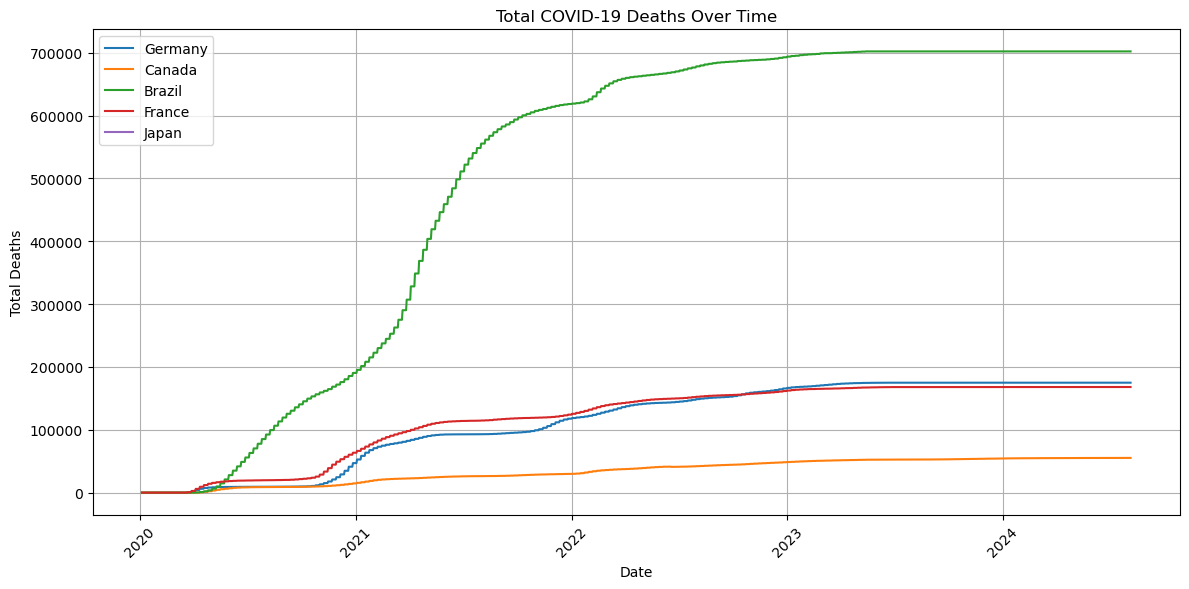

In [23]:
# Plot total deaths overtime
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot daily New Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot total Vaccinations Over Time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Get latest death rates
latest_death_rates = df_filtered.sort_values('date').groupby('location').tail(1)[['location', 'death_rate']]

print("Latest Death Rates (%):")
print(latest_death_rates)

Latest Death Rates (%):
       location  death_rate
65299    Canada    1.147154
51907    Brazil    1.871714
132040   France    0.431030
142084  Germany    0.455227


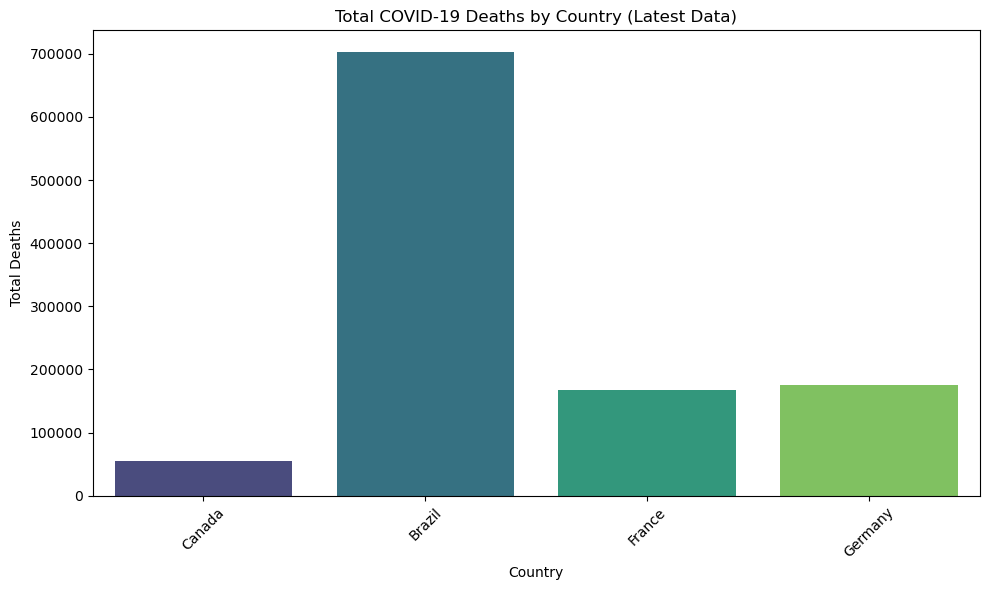

In [30]:
latest_total_deaths = df_filtered.sort_values('date').groupby('location').tail(1)[['location', 'total_deaths']]
# Plot Total Deaths by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='total_deaths', data=latest_total_deaths, palette='viridis')
plt.title('Total COVID-19 Deaths by Country (Latest Data)')
plt.ylabel('Total Deaths')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

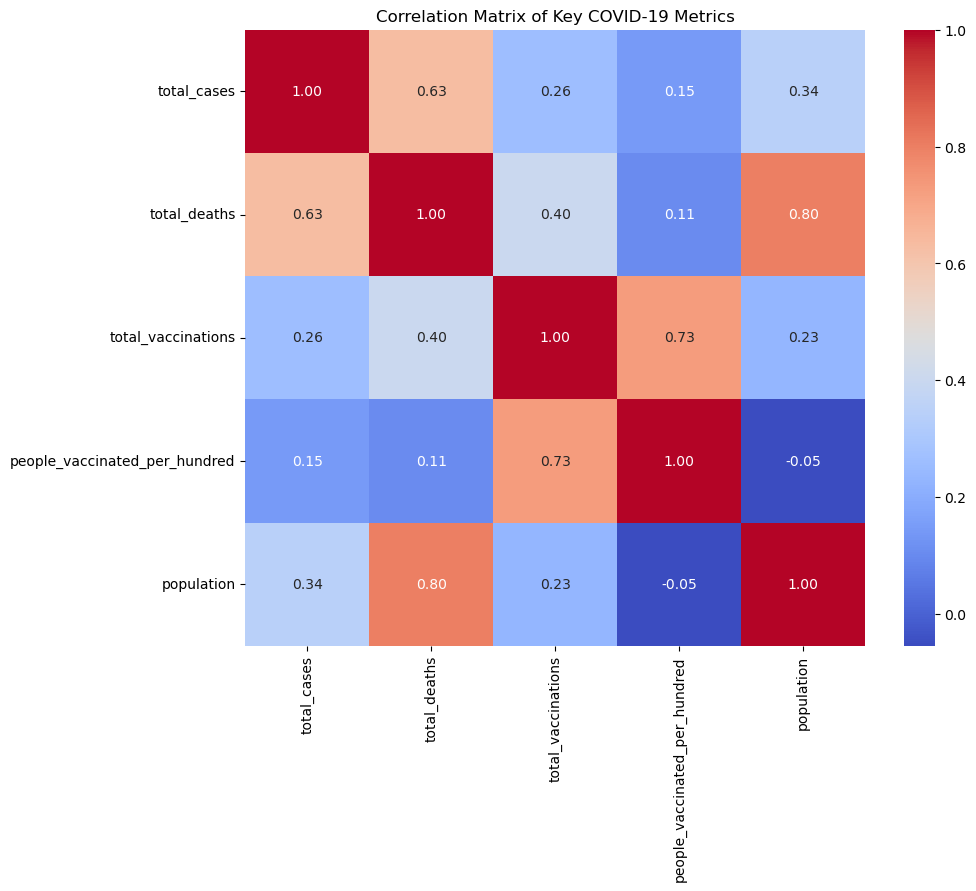

In [31]:
# Correlation Between Metrics
# Select key metrics for correlation analysis
metrics = ['total_cases', 'total_deaths', 'total_vaccinations', 'people_vaccinated_per_hundred', 'population']
correlation_matrix = df_filtered[metrics].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key COVID-19 Metrics')
plt.show()

# Project Insights

## 1. Total Deaths Comparison
**Bril** had the highest number of total deaths among all selected countries.

## 2. Daily New Cases Trds

*erman* and France** experienced multiple waves but managed to control daily case increases effectively.

## 3. Vaccinationollout
**Geany** d **France** vaccinated their populations ster tn **Bzil**nd **Japan**, which likely contributed to better outcomes.

## 4. Death Rate Analysis

Despite higcase mbers, **Japan** maintained one of the lowest death rates, suggesting effective public health strategies.

## 5. Correlation Between Metrics

There is a strong positive correlation between total cases and total deaths, highlighting the importance of containment measures.